# Final Project Winter 2024
### Name: Mouyseang An
### Section: INFO 3100-2
### Date: 3/10/2024


### **Import Libraries and Sources**


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import sqlite3
import random
from datetime import datetime

### **Color Dictionaries** 

In [2]:
#Color references from SchemeColor
#Extract the color that best suit the personal color                
ColorPalettes= {
    "Spring":{"Casual":{"Top":
                        {"Rose":"#FDE4DE", "Light Green":"#D0E69E","Light Yellow":"#F8F2BB",
                          "Pastel Purple":"#B19CD9", "Pastel Yellow":"#FDFD96","Blue Jeans": "#57B2E8"
                        ,"Pink":"#FF8BA0", "Timberwolf":"#D3E5CF", "Raspberry":"#E40A5B","Pastel Green": "#77DF78"},
                    
                        "Dress":{"Rose":"#FDE4DE", "Light Green":"#D0E69E","Light Yellow":"#F8F2BB",
                          "Pastel Purple":"#B19CD9", "Pastel Yellow":"#FDFD96","Blue Jeans":"#57B2E8"
                        ,"Pink":"#FF8BA0", "Timberwolf":"#D3E5CF", "Raspberry":"#E40A5B","Pastel Green": "#77DF78"},
                    
                        "Bottom":{"Light Wash Denim": "#B0C4DE","Vintage Black Denim": "#3D3C3A","Faded Black": "#545454",
                                   "Classic Denim Blue": "#0F4C81","Charcoal Gray":"#36454F","Earthy Olive": "#708238"}},        
              "Party":{"Top": 
                       {"Light Rose": "#FFC0CB", "Tangerine": "#F28500", "Peach":"#FFE5B4","Sky Blue":"#87CEEB",
                        "Lemon Yellow":"#FFF44F","Soft Lavender": "#E6E6FA", "Turquoise": "#40E0D0"},
                       
                        "Dress":{"Light Rose": "#FFC0CB", "Tangerine": "#F28500", "Peach":"#FFE5B4","Sky Blue":"#87CEEB",
                           "Lemon Yellow":"#FFF44F","Soft Lavender": "#E6E6FA", "Turquoise": "#40E0D0"},
                        
                        "Bottom":{"Navy Blue": "#000080","Metallic Silver": "#C0C0C0", "Rich Burgundy": "#800020",
                                   "Vintage Black Denim": "#3D3C3A","Faded Black": "#545454"}},
              "Beach":{"Top":
                       {"Sky Blue": "#87CEEB", "Light Pink": "#FFB6C1","Powder Blue":"#B0E0E6", "Lavender": "#E6E6FA",
                       "Soft Coral": "#F88379","Mint Green": "#98FF98"},
                      
                    "Dress":{"Sky Blue": "#87CEEB", "Light Pink": "#FFB6C1","Powder Blue":"#B0E0E6", "Lavender": "#E6E6FA",
                       "Soft Coral": "#F88379","Mint Green": "#98FF98"},
                        
                    "Bottom":{"Sky Blue": "#87CEEB","Sandy Beige": "#F4A460","Aqua Marine": "#7FFFD4","Coral": "#FF7F50",
                               "Seafoam Green": "#93E9BE","Sunset Orange": "#FD5E53","Khaki": "#F0E68C","Beige":"#F5F5DC"}}},                    
                               
    "Autumn": {"Casual":{"Top":
                         {"Cream ":"#FFFDD3", " White" : "#FFFFFB", " Avocado": "#4E7214", 
                           "Green Sheen": "#7BB5A2","Beaver":"#A18B69", "Deep Space" : "#446072" ,
                           "Earth Brown": "#5D3B28", " Gray": "#7F8378",  "Silver Pink": "#BEB4A7","Yankees Blue": "#1B2740"},
                        
                        "Dress":{"Cream ":"#FFFDD3", " White" : "#FFFFFB", "Avocado": "#4E7214", 
                           "Green Sheen": "#7BB5A2","Beaver":"#A18B69", "Deep Space" : "#446072" ,
                           "Earth Brown": "#5D3B28", "Gray": "#7F8378",  "Silver Pink": "#BEB4A7","Yankees Blue": "#1B2740"},
                               
                        "Bottom": {"Burnt Sienna": "#E97451","Light Wash Denim": "#B0C4DE","Vintage Black Denim": "#3D3C3A","Faded Black": "#545454",
                                   "Classic Denim Blue": "#0F4C81","Charcoal Gray":"#36454F","Earthy Olive": "#708238"}},          
                        
               "Party":{"Top":{"Maroon":"#800000","Dark Olive Green": "#556B2F","Saddle Brown":"#8B4513","Chocolate":"#D2691E","Sienna": "#A0522D"
                         ,"Dark Goldenrod": "#B8860B", "Midnight Blue": "#191970","Indigo": "#4B0082","Dark Slate Gray": "#2F4F4F"}, 
                        
                        "Dress":{"Maroon":"#800000","Dark Olive Green": "#556B2F","Saddle Brown":"#8B4513","Chocolate":"#D2691E","Sienna": "#A0522D"
                         ,"Dark Goldenrod": "#B8860B", "Midnight Blue": "#191970","Indigo": "#4B0082","Dark Slate Gray": "#2F4F4F"}, 
                        
                        "Bottom":{"Navy Blue": "#000080","Metallic Silver": "#C0C0C0", "Rich Burgundy": "#800020",
                                   "Vintage Black Denim": "#3D3C3A","Faded Black": "#545454"}},      
                         
               "Beach":{"Top":{"Peach": "#FFDAB9","Teal":"#008080","Sandy Brown": "#F4A460", "Blue":"#87CEEB", "Coral": "#FF7F50", "Khaki": "#F0E68C",
                        "Wheat":"#F5DEB3"},
                    
                        "Dress":{"Peach": "#FFDAB9","Teal":"#008080","Sandy Brown": "#F4A460", "Blue":"#87CEEB", "Coral": "#FF7F50", "Khaki": "#F0E68C",
                        "Wheat":"#F5DEB3"},
                        
                        "Bottom":{"Warm Sand":"#C2B280","Navy Blue": "#000080","Olive Green": "#708238","Teal":"#008080"}}},      
      
    "Summer": {"Casaul":
                   {"Top": {"Piggy Pink": "#FAE0E6" , "Linen": "#FAEEEA", "Ivory":"#FEFEF0", "Pale Blue":"#B3EAF3","Light Sea Green":"#20B2AA",
                       "Tea Green" : "#C5ECD1", "Purple": "#D2C0EE", "Light Orange": "#FED8B2", "Nyanza": "#E5FADC"
                       , " White Coffee ": "#E7E3D5", "Khaki": "#F0E68"},
                
                    "Dress":{"Piggy Pink": "#FAE0E6" , "Linen": "#FAEEEA", "Ivory":"#FEFEF0", "Pale Blue":"#B3EAF3","Light Sea Green":"#20B2AA",
                       "Tea Green" : "#C5ECD1", "Purple": "#D2C0EE", "Light Orange": "#FED8B2", "Nyanza": "#E5FADC"
                       , " White Coffee ": "#E7E3D5", "Khaki": "#F0E68"},
                
                    "Bottom":{"Light Wash Denim": "#B0C4DE","Vintage Black Denim": "#3D3C3A","Faded Black": "#545454",
                                   "Classic Denim Blue": "#0F4C81","Charcoal Gray":"#36454F","Earthy Olive": "#708238"}},
                
                "Party":
                     {"Top":{"Deep Turquoise": "#00CED1", "Cobalt Blue":"#0047AB","Emerald Green": "#50C878"
                         ,"Ruby Red":"#9B111E", "Burnt Orange": "#CC5500", "Dark Orchid": "#9932CC"},
                    
                    "Dress":{"Deep Turquoise": "#00CED1", "Cobalt Blue":"#0047AB","Emerald Green": "#50C878"
                         ,"Ruby Red":"#9B111E", "Burnt Orange": "#CC5500", "Dark Orchid": "#9932CC"},
                     
                     "Bottom":{"Navy Blue": "#000080","Metallic Silver": "#C0C0C0", "Rich Burgundy": "#800020",
                                   "Vintage Black Denim": "#3D3C3A","Faded Black": "#545454"}},     
                "Beach":
                      {"Top":{"Turquoise":"#30D5C8", "Coral":"#FF7F50", "Sky Blue":"#87CEEB","Seafoam Green": "#93E9BE","Pale Pink": "#FADADD",
                            "Powder Blue": "#B0E0E6","Lavender":"#E6E6FA","Light Coral": "#F08080"},           
                     
                        "Dress":{"Turquoise":"#30D5C8", "Coral":"#FF7F50", "Sky Blue":"#87CEEB","Seafoam Green": "#93E9BE","Pale Pink": "#FADADD",
                            "Powder Blue": "#B0E0E6","Lavender":"#E6E6FA","Light Coral": "#F08080"},
                 
                        "Bottom":{"Sky Blue": "#87CEEB","Sandy Beige": "#F4A460","Aqua Marine": "#7FFFD4","Coral": "#FF7F50",
                               "Seafoam Green": "#93E9BE","Sunset Orange": "#FD5E53","Khaki": "#F0E68C","Beige":"#F5F5DC"}}},
                
    "Winter":{"Casual": 
                  {"Top": {"True Red": "#FF0000", "Black": "#000000", "White:": "#FFFFFF", "Icy Blue ": "#AFEEEE", " Charcoal Grey":"#36454F", 
               "Ruby Red ": "#9B111E", "Pine Green:": "#01796F", "Deep Purple ": "#673AB7", "Hot Pink": "#FF69B", "Bright Turquoise": "#40E0D0"},
                   
                   "Dress":{"True Red": "#FF0000", "Black ": "#000000", "White: ": "#FFFFFF", "Icy Blue": "#AFEEEE", " Charcoal Grey":"#36454F", 
               "Ruby Red ": "#9B111E", "Pine Green:": "#01796F", "Deep Purple": "#673AB7", "Hot Pink ": "#FF69B", "Bright Turquoise": "#40E0D0"},
                
                    "Bottom":{"Light Wash Denim": "#B0C4DE","Vintage Black Denim": "#3D3C3A","Faded Black": "#545454",
                                   "Classic Denim Blue": "#0F4C81","Charcoal Gray":"#36454F","Earthy Olive": "#708238"}},
              "Party":
                     {"Top": {"Midnight Blue": "#191970","Charcoal Grey": "#36454F","Burgundy": "#800020","Plum": "#8E4585","Deep Purple": "#673AB7",
                       "Ruby Red":"#9B111E", "Dark Teal": "#004B49","Hunter Green":"#355E3B"},
                    
                    "Dress":{"Midnight Blue": "#191970","Charcoal Grey": "#36454F","Burgundy": "#800020","Plum": "#8E4585","Deep Purple": "#673AB7",
                       "Ruby Red":"#9B111E", "Dark Teal": "#004B49","Hunter Green":"#355E3B"},
                
                    "Bottom":{"Midnight Blue": "#191970" ,"Emerald Green": "#50C878","Gunmetal Gray": "#2a3439","Metallic Silver": "#C0C0C0"
                               ,"Faded Black": "#545454","Vintage Black Denim": "#3D3C3A"}},
                
              "Beach":{"Top": {"Icy Blue": "#AFEEEE","Silver": "#C0C0C0", "Cool Lavender":"#E6E6FA", "Mint Green": "#98FF98",
                       "Powder Blue": "#B0E0E6","Soft Coral": "#F88379", "Light Grey": "#D3D3D3", "Sky Blue": "#87CEEB"},              
                     
                     "Dress":{"Icy Blue": "#AFEEEE","Silver": "#C0C0C0", "Cool Lavender":"#E6E6FA", "Mint Green": "#98FF98",
                       "Powder Blue": "#B0E0E6","Soft Coral": "#F88379", "Light Grey": "#D3D3D3", "Sky Blue": "#87CEEB"},               
                
                    "Bottom":{"Deep Navy": "#000080","Burgundy": "#800020","Forest Green": "#228B22",
                               "Teal": "#008080","Plum": "#DDA0DD","Charcoal": "#36454F"}}}}

### **User Interaction**

In [3]:
def UserInput():
        UserConsent = input("WELCOME TO COLOR ADVISOR\nWe will ask you a few questions before we process to give you the color recommendation. Would that be okay for you?(Yes/No) \n").capitalize()
        if UserConsent != "Yes":
            print("You have choosen to exit the application. Thank you!")
            return None 
        UserName = input("What is your name?")
        UserAnswer = input(f"{UserName}, Do you have your own personal color (Yes/No)?").capitalize()
        
        if UserAnswer == "Yes":
            UserSeasonColor = input("Please enter your personal color(Spring, Autumn, Summer, Winter): ").capitalize()
            UserOccasion = input("Please let me know your occasion (Party,Beach or Casual): ").capitalize()
            UserClotheType = input("Are you looking for recommendation for Top,Bottom or Dress?").capitalize()
        
        elif UserAnswer == "No": 
            UserSeasonColor = input("Which seasonal color do you like the most (Spring, Autumn, Summer, Winter)").capitalize() #User Preference season, if they put the one of the season color, then it will assume the user preference similar to season personal color in dictionaries 
            UserOccasion = input("Please let me know your occasion (Party,Beach or Casual): ").capitalize()
            UserClotheType = input("Are you looking for recommendation for Top,bottom or Dress?").capitalize()
        
        else:
            print("Please enter the correct color season again. Thank you:)")
            return None
        return UserName,UserSeasonColor,UserOccasion,UserClotheType   


### **Color Suggestion Function**

In [4]:
def ColorSuggestion(UserSeasonColor,UserOccasion,UserClotheType):
    try: 
        UserColorInDictionary = ColorPalettes[UserSeasonColor][UserOccasion][UserClotheType]
        ColorList = list(UserColorInDictionary.items())
        RecommendedColors = random.sample(ColorList, min(len(ColorList), 3)) 
        return RecommendedColors
    except KeyError:
        print("Please enter your season color, occasion and clothe type correctly to get the right suggestion. Thank you.") 
        return None   


### **Display Color Suggestions**

In [5]:
def DisplayColorSuggestion(RecommendedColors,UserSeasonColor,UserOccasion,UserClotheType):
    if not RecommendedColors:
        print("No Color to Display") 
        return None
    
    NameOfColor =[Color[0] for Color in RecommendedColors]
    ColorCode =[Color[1] for Color in RecommendedColors]
    plt.figure(figsize = (7,6))
    plt.bar(NameOfColor, [1]*len(ColorCode), color=ColorCode)
    plt.xticks(rotation = 45)
    plt.ylabel("Name of Color") 
    plt.title(f"Color Sugguestions for {UserClotheType} for {UserOccasion} Style in {UserSeasonColor}") 
    plt.show()

### **Storing User Data**

In [6]:
#Reference John Watson Rooney from Youtube 
def CreateDatabase():
    connection = sqlite3.connect("ColorAdvisorUserResult.db")
    cursor = connection.cursor() #create from connect and execute the command on the database
    cursor.execute('''CREATE TABLE IF NOT EXISTS ColorAdvisorUserResult
                    (Time Text, UserName Text, SeasonColor Text, Occasion Text, ClotheType Text, RecommendedColors Text)
                    ''')
    connection.commit() #ensure the table is save
    connection.close()
    
def UserSaveResult(UserName, SeasonColor,Occasion,ClotheType,RecommendedColors):    
    connection = sqlite3.connect("ColorAdvisorUserResult.db")
    cursor = connection.cursor() 
    cursor.execute("INSERT INTO ColorAdvisorUserResult VALUES(?,?,?,?,?,?)", (datetime.now().strftime("%Y-%m-%d %H:%M:%S"),UserName,SeasonColor,Occasion, ClotheType, ",".join(RecommendedColors)))
    connection.commit()
    connection.close()
    

def HistoryCheck(UserName):
    connection = sqlite3.connect("ColorAdvisorUserResult.db")
    cursor = connection.cursor() 
    cursor.execute("SELECT * FROM ColorAdvisorUserResult WHERE UserName =?", (UserName,))
    Result = cursor.fetchall() #bring back all row of the query result
    connection.close()
    return Result

def UserHistoryCheck():
    UserName = input("Please enter your name to check your saved history in the record: ") 
    UserHistoryRecord = HistoryCheck(UserName)
    if UserHistoryRecord: 
        for table in UserHistoryRecord:
            print(f"Time:{table[0]},UserName: {table[1]}, SeasonColor: {table[2]}, Occasion:{table[3]},ClotheType: {table[4]},RecommendedColors: {table[5]}")
    else:
        print("There is no record of your saved data. Please check your name correctly!")
                  

### **Main Application**

WELCOME TO COLOR ADVISOR
We will ask you a few questions before we process to give you the color recommendation. Would that be okay for you?(Yes/No) 
 yes
What is your name? s
s, Do you have your own personal color (Yes/No)? yes
Please enter your personal color(Spring, Autumn, Summer, Winter):  Spring
Please let me know your occasion (Party,Beach or Casual):  Party
Are you looking for recommendation for Top,Bottom or Dress? Top


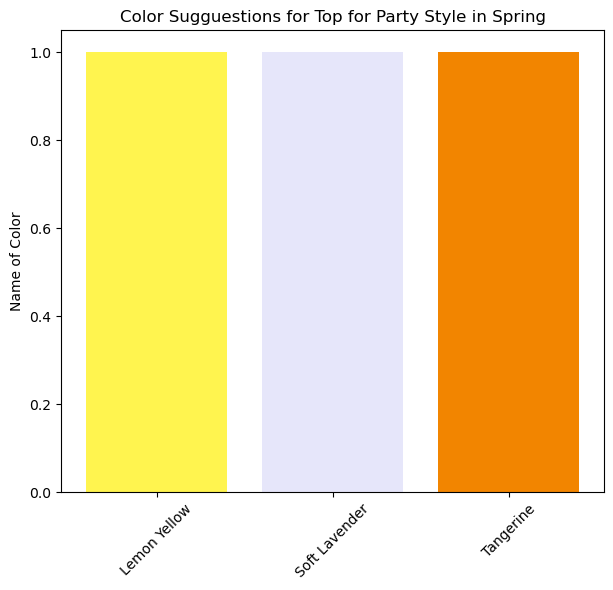

[('2024-07-08 19:15:40', 's', 'Spring', 'Party', 'Top', 'Sky Blue,Soft Lavender,Lemon Yellow'), ('2024-08-01 20:03:22', 's', 'Spring', 'Party', 'Top', 'Lemon Yellow,Soft Lavender,Tangerine')]


In [7]:
def main():
    CreateDatabase()
    UserInputResult = UserInput()
    if UserInputResult:
        UserName,UserSeasonColor,UserOccasion,UserClotheType = UserInputResult
        RecommendedColors =  ColorSuggestion(UserSeasonColor,UserOccasion,UserClotheType)
        if RecommendedColors:
            DisplayColorSuggestion(RecommendedColors, UserSeasonColor,UserOccasion, UserClotheType)
            RecommendedColorsName = [Color[0] for Color in RecommendedColors]
            UserSaveResult(UserName,UserSeasonColor, UserOccasion,UserClotheType, RecommendedColorsName)
            print(HistoryCheck(UserName))
if __name__ == "__main__":
    main()

In [8]:
UserHistoryCheck()

Please enter your name to check your saved history in the record:  s


Time:2024-07-08 19:15:40,UserName: s, SeasonColor: Spring, Occasion:Party,ClotheType: Top,RecommendedColors: Sky Blue,Soft Lavender,Lemon Yellow
Time:2024-08-01 20:03:22,UserName: s, SeasonColor: Spring, Occasion:Party,ClotheType: Top,RecommendedColors: Lemon Yellow,Soft Lavender,Tangerine
